# Initialize

In [39]:
from warnings import filterwarnings
filterwarnings('ignore')

from glob import glob
from tqdm import tqdm
from collections import deque

import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
import numpy as np
import os

In [40]:
gp_path = f"{os.getcwd().split('EDA')[0]}\\EDA"
csv_path = f"{os.getcwd().split('EDA')[0]}\\web_crawling"
print(gp_path, csv_path, sep='\n')

c:\Users\NT550-045\Desktop\ml2\\EDA
c:\Users\NT550-045\Desktop\ml2\\web_crawling


In [41]:
raw_path = glob(f'{csv_path}\\**\\raw_*.csv', recursive=True)[0]
tag_path = glob(f'{csv_path}\\**\\tag_*.csv', recursive=True)[0]
print(raw_path, tag_path, sep='\n')

c:\Users\NT550-045\Desktop\ml2\\web_crawling\merge_dataset\raw_merge.csv
c:\Users\NT550-045\Desktop\ml2\\web_crawling\merge_dataset\tag_merge.csv


# Data Load

In [42]:
raw = pd.read_csv(raw_path, sep='\t')
tag = pd.read_csv(tag_path)

## Data Check

### Define check_info

In [43]:
def check_info(df, type_=None):
    column_list = []
    if type_ == 'object':
        for col in df.columns:
            if df[col].dtype == type_:
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    elif type_ == 'int':
        for col in df.columns:
            if df[col].dtype == 'int64' or df[col].dtype == 'int32':
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    elif type_ == 'float':
        for col in df.columns:
            if df[col].dtype == 'float64' or df[col].dtype == 'float34':
                print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
                column_list.append(col)
        return column_list
    
    else:
        for col in df.columns:
            print(f'col :{col}\ttype :{df[col].dtype}\tNa :{sum(df[col].isna())}')
    

### Check Data Info

In [44]:
# 'genre', 'platforms_num' 컬럼이 Na면 삭제
r_df = raw.copy()

In [45]:
object_col = check_info(r_df, 'object')
print(object_col)

col :genre	type :object	Na :0
col :new_date	type :object	Na :0
col :Review	type :object	Na :0
['genre', 'new_date', 'Review']


In [46]:
int_col = check_info(r_df, 'int')
print(int_col)

col :appid	type :int64	Na :0
col :24_Hour_Peak	type :int64	Na :0
col :All_time_peak	type :int64	Na :0
col :positive	type :int64	Na :0
col :negative	type :int64	Na :0
col :average_forever	type :int64	Na :0
col :average_2weeks	type :int64	Na :0
col :median_forever	type :int64	Na :0
col :median_2weeks	type :int64	Na :0
col :num_lang	type :int64	Na :0
col :is_free	type :int64	Na :0
col :controller_support	type :int64	Na :0
col :metacritic_tf	type :int64	Na :0
col :days_after_release	type :int64	Na :0
['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative', 'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks', 'num_lang', 'is_free', 'controller_support', 'metacritic_tf', 'days_after_release']


In [47]:
float_col = check_info(r_df, 'float')
print(float_col)

col :price	type :float64	Na :0
col :initialprice	type :float64	Na :0
col :required_age	type :float64	Na :0
col :dlc	type :float64	Na :0
col :metacritic	type :float64	Na :45005
col :windows	type :float64	Na :0
col :mac	type :float64	Na :0
col :linux	type :float64	Na :0
col :platforms_num	type :float64	Na :0
col :recommendations	type :float64	Na :0
col :achievements	type :float64	Na :0
['price', 'initialprice', 'required_age', 'dlc', 'metacritic', 'windows', 'mac', 'linux', 'platforms_num', 'recommendations', 'achievements']


### EDA

#### Int Col

In [49]:
print(len(int_col[1:]))

13


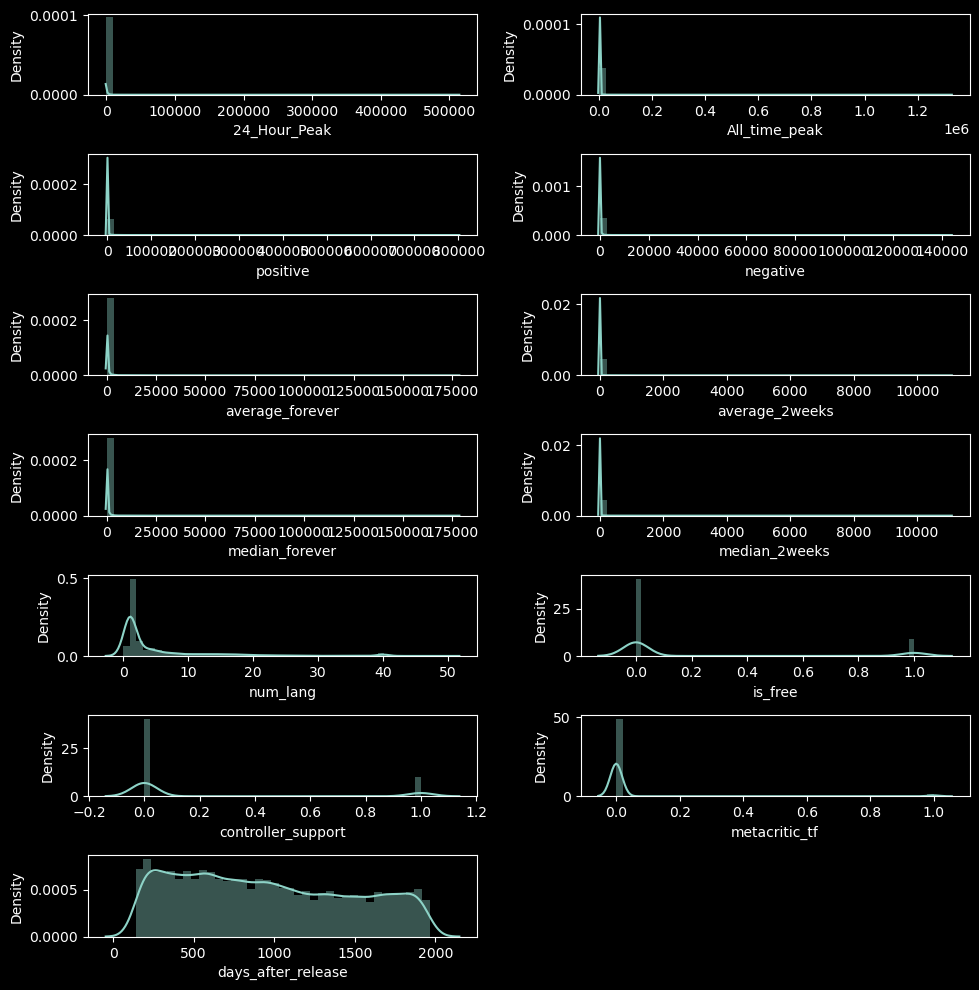

In [65]:
plt.style.use(['dark_background'])

for i in range(0, len(int_col[1:])):
    plt.subplot(7,2,i+1)
    sns.distplot(r_df.loc[:,int_col[1:][i]])

plt.gcf().set_size_inches(10,10)
plt.tight_layout()
plt.show()

#### Float Col

In [60]:
print(len(float_col))

11


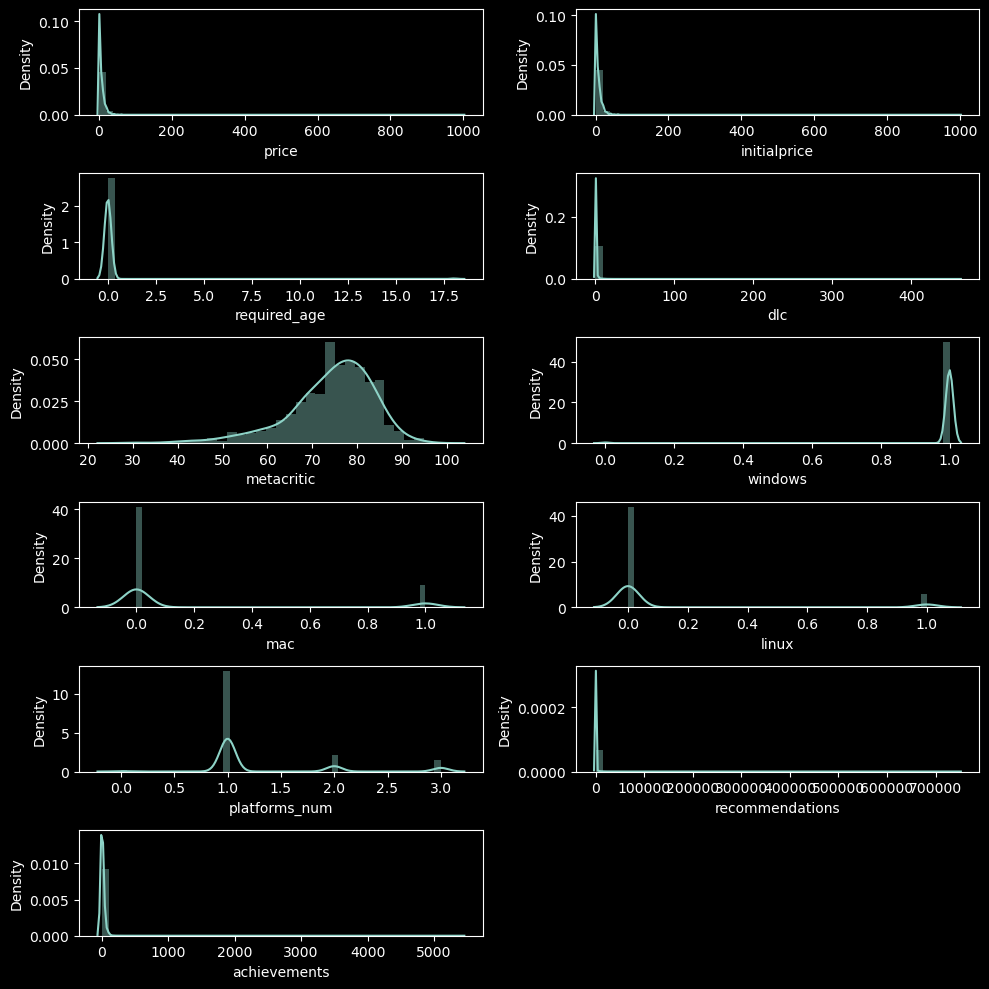

In [64]:
float_col2 =['price', 'initialprice', 'required_age', 'dlc', 'windows', 'mac', 'linux',
            'platforms_num', 'recommendations', 'achievements']


for i in range(0, len(float_col)):
    plt.subplot(6,2,i+1)
    sns.distplot(r_df.loc[:,float_col[i]])

plt.gcf().set_size_inches(10,10)
plt.tight_layout()
plt.show()

#### Target Col Preprocessing

```
Positive, Negative, Mixed, Indifference
```

In [70]:
r_df['Review'].value_counts()

Very Positive              7498
Positive                   6950
Mixed                      6575
Mostly Positive            4701
1 user reviews             3706
2 user reviews             2908
3 user reviews             2343
4 user reviews             1940
No user reviews            1815
5 user reviews             1669
6 user reviews             1423
7 user reviews             1244
8 user reviews             1100
Mostly Negative             957
9 user reviews              948
Overwhelmingly Positive     270
Negative                    185
Very Negative                17
Overwhelmingly Negative       3
Name: Review, dtype: int64

In [73]:
r_df['Target'] = r_df['Review'].apply(lambda x:'Positive' if 'Positive' in x else x).apply(lambda x:'Negative' if 'Negative' in x else x).apply(lambda x:'Indifference' if 'user' in x else x)

In [74]:
r_df['Target'].value_counts(normalize=True)

Positive        0.419852
Indifference    0.412869
Mixed           0.142156
Negative        0.025123
Name: Target, dtype: float64

#### Object Col

In [75]:
check_info(r_df, 'object')

col :genre	type :object	Na :0
col :new_date	type :object	Na :0
col :Review	type :object	Na :0
col :Target	type :object	Na :0


['genre', 'new_date', 'Review', 'Target']

In [76]:
r_df['new_date'] = pd.to_datetime(r_df['new_date'])
r_df['year'] = r_df['new_date'].dt.year
r_df['month'] = r_df['new_date'].dt.month

In [124]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   appid               46252 non-null  int64         
 1   24_Hour_Peak        46252 non-null  int64         
 2   All_time_peak       46252 non-null  int64         
 3   positive            46252 non-null  int64         
 4   negative            46252 non-null  int64         
 5   average_forever     46252 non-null  int64         
 6   average_2weeks      46252 non-null  int64         
 7   median_forever      46252 non-null  int64         
 8   median_2weeks       46252 non-null  int64         
 9   price               46252 non-null  float64       
 10  initialprice        46252 non-null  float64       
 11  genre               46252 non-null  object        
 12  num_lang            46252 non-null  int64         
 13  required_age        46252 non-null  float64   

In [123]:
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()
r_df['Target_'] = scale.fit_transform(r_df['Target'])

In [125]:
r_df['metacritic'] = r_df['metacritic'].fillna(0)

In [126]:
r_df.columns

Index(['appid', '24_Hour_Peak', 'All_time_peak', 'positive', 'negative',
       'average_forever', 'average_2weeks', 'median_forever', 'median_2weeks',
       'price', 'initialprice', 'genre', 'num_lang', 'required_age', 'is_free',
       'controller_support', 'dlc', 'metacritic', 'metacritic_tf', 'windows',
       'mac', 'linux', 'platforms_num', 'recommendations', 'achievements',
       'new_date', 'days_after_release', 'Review', 'Target', 'year', 'month',
       'Target_'],
      dtype='object')

In [132]:
r_df = r_df.drop(['genre','new_date','Target'], axis=1)

In [133]:
r_df.to_csv('./pre_data.csv', index=False)